In [1]:
# # Mount GDrive
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image

from tensorflow.keras import Sequential, layers, models
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.model_selection import train_test_split

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_input_vgg16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#from tensorflow.keras.models import Sequential, Model
#from tensorflow.keras import layers, optimizers, callbacks

#from keras.applications.resnet50 import ResNet50
#from tensorflow.keras.applications.resnet50 import ResNet50
#from tensorflow.keras.applications.resnet50 import preprocess_input as preproc_res


import matplotlib.pyplot as plt

#Put Colab in the context of this challenge
import os

In [2]:
df_masked_cat = pd.read_csv('df_masked_cat.csv')
#df_masked.head(5)

In [40]:
from os import walk

data_path = 'data/high_res'

f = []
for (dirpath, dirnames, filenames) in walk(data_path):
    f.extend(filenames)
    break

In [41]:
len(filenames)

1368

In [32]:
list(df_masked_cat.Id.unique())

[40733,
 38729,
 39400,
 34201,
 10451,
 31675,
 38586,
 32240,
 33103,
 34190,
 38423,
 39787,
 38391,
 38555,
 38605,
 41007,
 38588,
 40872,
 40640,
 38649,
 40480,
 38243,
 40958,
 38229,
 35064,
 10375,
 38220,
 40653,
 10468,
 32774,
 38737,
 31903,
 10690,
 38205,
 41118,
 40665,
 31825,
 38479,
 41227,
 38307,
 41278,
 34186,
 40722,
 38298,
 40973,
 34265,
 38876,
 38535,
 39737,
 32445,
 40744,
 38408,
 41219,
 40960,
 10841,
 34782,
 38215,
 38284,
 10806,
 10292,
 10528,
 34219,
 32469,
 34135,
 34037,
 33337,
 38654,
 38684,
 32082,
 31347,
 10882,
 31941,
 41607,
 34355,
 39175,
 41287,
 38487,
 40479,
 41264,
 39454,
 34159,
 10520,
 40917,
 31883,
 40839,
 33995,
 34417,
 38648,
 33994,
 38653,
 31451,
 41129,
 40571,
 38639,
 31678,
 34238,
 40629,
 41046,
 10584,
 34664,
 39250,
 33414,
 10478,
 31385,
 41165,
 10695,
 10549,
 40701,
 41566,
 38640,
 39306,
 33105,
 40511,
 41128,
 34019,
 40441,
 39334,
 38254,
 38616,
 10596,
 40821,
 31797,
 38930,
 34228,
 34874,


In [42]:
images_ids = []

for filename in filenames:
    #image_id = print(int(filename.strip('.png')))
    
    #print(Id)
    
    images_ids.append(int(filename.strip('.png')))

images_ids

[39572,
 39228,
 10889,
 10645,
 39599,
 41344,
 40728,
 34526,
 41807,
 41813,
 34254,
 34532,
 10484,
 39758,
 38446,
 31310,
 38452,
 38334,
 31476,
 10321,
 41608,
 32802,
 41152,
 38268,
 39638,
 31502,
 38240,
 41032,
 41026,
 38283,
 32553,
 33103,
 34678,
 10916,
 40674,
 38917,
 34693,
 38903,
 40660,
 40890,
 34877,
 41224,
 41225,
 40891,
 41219,
 31926,
 40661,
 38916,
 33843,
 34692,
 34679,
 38731,
 34645,
 10526,
 10240,
 32778,
 41796,
 34453,
 41153,
 10452,
 38453,
 34269,
 31463,
 33512,
 39771,
 10485,
 34533,
 34527,
 31339,
 39765,
 38876,
 40701,
 34080,
 10888,
 10650,
 31675,
 10863,
 38889,
 38651,
 34719,
 33738,
 31893,
 10849,
 39203,
 10691,
 31887,
 39565,
 38653,
 40717,
 34096,
 34082,
 41353,
 41347,
 38684,
 39773,
 32626,
 38479,
 38337,
 39997,
 31307,
 38445,
 10322,
 41179,
 10478,
 41637,
 39798,
 41145,
 39175,
 38243,
 38531,
 41019,
 40461,
 10256,
 40475,
 32961,
 40449,
 41031,
 39363,
 34653,
 34135,
 39439,
 31703,
 10915,
 41596,
 40663,


In [43]:
len(images_ids)

1368

In [44]:
df_masked_cat

,Unnamed: 0.1,Unnamed: 0,index,Id,Lon,Lat,Country,State,LGA,Ward,...,Generator capacity (kw),PV size(kW),Battery capacity (kWh),Demand,Electr_type_phase_1,Electr_type_phase_2,Electr_type_phase_3,Distance_m,demand_cat_4,demand_cat_2
0,0,1654.0,146.0,40733,4.742796,13.004795,Nigeria,Sokoto,Silame,MARAFA WEST,...,194.0,196.0,448.0,279,none,grid,grid,3870.0,4,1
1,1,954.0,250.0,38729,8.794116,9.100529,Nigeria,Plateau,Bokkos,TOFF,...,151.0,160.0,352.0,209,none,mini-grid,intercon,36750.0,4,1
2,2,1139.0,435.0,39400,9.598031,8.457592,Nigeria,Plateau,Shendam,AZARA,...,147.0,188.0,392.0,210,mini-grid,mini-grid,intercon,37260.0,4,1
3,3,1338.0,90.0,34201,4.450469,6.988445,Nigeria,Ogun,Ijebu East,OSUN,...,124.0,136.0,312.0,178,none,none,grid,41620.0,3,1
4,4,92.0,92.0,10451,9.020765,6.159864,Nigeria,Cross River,Boki,ABO,...,261.0,326.0,664.0,361,none,mini-grid,intercon,20970.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,1678,NaN,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1,0
1679,1679,NaN,NaN,144,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1,0
1680,1680,NaN,NaN,145,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1,0
1681,1681,NaN,NaN,146,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1,0


In [45]:
len(images_ids)

1368

In [46]:
int(df_masked_cat[df_masked_cat['Id'] == 41213].Demand.values[0])

177

In [49]:
y = []
for image_id in images_ids:
    #print(id)
    #y.append(int(df_masked_cat[df_masked_cat['Id'] == image_id].Demand.values[0]))
    #print(int(df_masked_cat[df_masked_cat['Id'] == image_id].Demand.values[0]))
    y.append(int(df_masked_cat[df_masked_cat['Id'] == image_id].Demand.values[0]))
len(y)

1368

In [50]:
len(y)

1368

In [51]:
def load_sattelite_images(data_path, data_folder, y):
        
    data_path = data_path
    y = np.array(y)
    imgs = []
    images_path = [os.path.join(data_folder, elt) for elt in os.listdir(os.path.join(data_path)) if elt.find('.png')>0]
    
    for path in images_path:
        if os.path.exists(path):
            image = Image.open(path)
            #image = image.resize((256, 256))
            imgs.append(np.array(image))

    X = np.array(imgs)
    #print(X.shape)

    X_train, X_sub, y_train, y_sub = train_test_split(X, y, test_size=0.40, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_sub, y_sub, test_size=0.20, random_state=42)

    #first_split = int(len(imgs) * .6)
    #second_split = first_split + int(len(imgs) * 0.2)

    #X_train, X_val, X_test = X[:first_split], X[first_split:second_split], X[second_split:]
    #y_train, y_val, y_test = y[:first_split], y[first_split:second_split], y[second_split:]

    return X_train, y_train, X_val, y_val, X_test, y_test

In [52]:
pwd

'/Users/karimelbana/SolarOdyssey/rrep-nigeria'

In [53]:
#os.chdir("drive/MyDrive/SolarOdyssey/rrep_nigeria/data")

In [54]:
data_path = 'data/high_res'
data_folder = 'data/high_res'
X_train, y_train, X_val, y_val, X_test, y_test = load_sattelite_images(data_path, data_folder, y)
print(X_train.shape, X_val.shape, X_test.shape)

(820, 512, 512, 3) (438, 512, 512, 3) (110, 512, 512, 3)


In [55]:
X_train.shape, np.array(y_train).shape, X_val.shape, np.array(y_val).shape, X_test.shape, np.array(y_test).shape

((820, 512, 512, 3),
 (820,),
 (438, 512, 512, 3),
 (438,),
 (110, 512, 512, 3),
 (110,))

In [56]:
#y_train

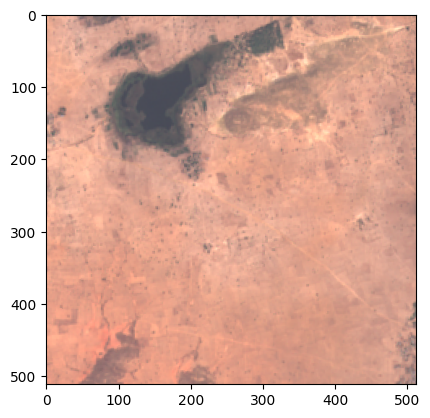

In [57]:
plt.imshow(X_train[0])

In [58]:
# #plot images
# plt.figure(figsize=(20,15))
# for i in range(9):
#   #for j in range(3):
#     #plt.subplot(9,3, j+1 + 3*i)
#     #plt.imshow(X_train[i])
#     plt.subplot(9,1, i+1)
#     plt.imshow(X_train[i])

In [59]:
# #plot images
# plt.figure(figsize=(20,15))
# for i in range(9):
#     plt.subplot(3,3, i+1)
#     plt.imshow(X_train[i])

In [60]:
# #plot images
# plt.figure(figsize=(20,15))
# for i in range(2):
#   for j in range(2):
#     plt.subplot(8,2,j+2*i+1)
#     plt.imshow(X_train[i][:,:,j], cmap='gray')

In [61]:
#Preprocess to match VGG16 or resnet50

model_selected = 'vgg16'

if model_selected == 'vgg16':
  X_train = preprocess_input_vgg16(X_train) 
  X_val = preprocess_input_vgg16(X_val)
  X_test = preprocess_input_vgg16(X_test)

elif model_selected == 'resnet50':
  X_train = preproc_res(X_train) 
  X_val = preproc_res(X_val)
  X_test = preproc_res(X_test)


In [62]:
#load model
def load_model(model_selected):

    model = Sequential()

    if model_selected == 'vgg16':
      model = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
    elif model_selected == 'resnet50':
      model = ResNet50(weights='imagenet', include_top = False, input_shape=X_train[0].shape)
    
    print(model.summary())

    return model

In [63]:
def set_nontrainable_layers(model):
    
  # Set the first layers to be untrainable
  model.trainable = False
        
  return model

In [64]:
def add_last_layers(model):
    '''Take a pre-trained model, set its parameters as non-trainable, and add additional trainable layers on top'''
    base_model = set_nontrainable_layers(model)    
    flatten_layer = layers.Flatten()
    dense_layer = layers.Dense(30, activation='relu')
    prediction_layer = layers.Dense(1, activation='linear')
    
    model_w_layers = models.Sequential([
        model,
        flatten_layer,
        dense_layer,
        prediction_layer
    ])
  
    return model_w_layers

In [65]:
def build_model(model_selected):
  
  model = load_model(model_selected)
  model_full = add_last_layers(model)
    
  #opt = optimizers.Adam(learning_rate=1e-4)

  model_full.compile(loss="mae", optimizer='adam', metrics='mae')
    
  return model_full

In [66]:
#base_model = load_model(model_selected)

In [67]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=20,
    width_shift_range=0,
    height_shift_range=0,
    horizontal_flip=True,
    validation_split=0.2)

In [68]:
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train)

In [69]:
model = Sequential()

#model = load_model(model_selected)
#model.summary()

model_built = build_model(model_selected)
model_built.summary()

es = EarlyStopping(monitor = 'val_loss', 
                   patience = 10, 
                   verbose = 1, 
                   restore_best_weights = True)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 128, 128, 128)     0     

In [70]:
history = model_built.fit(datagen.flow(X_train, y_train, batch_size=32) \
                          , validation_data=(X_val, y_val), epochs=50, batch_size=16, callbacks=[es])

Epoch 1/50


2023-03-12 21:59:43.890401: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


26/26 [==============================] - 1130s 44s/step - loss: 49.4669 - mae: 49.4669 - val_loss: 41.1588 - val_mae: 41.1588
Epoch 2/50
 2/26 [=>............................] - ETA: 8:14 - loss: 41.8965 - mae: 41.8965

KeyboardInterrupt: 

In [ ]:
print(model_built.evaluate(X_test, y_test, verbose=1))

1/1 [==============================] - 0s 233ms/step - loss: 1999.8970 - mse: 1999.8970
[1999.89697265625, 1999.89697265625]


In [ ]:
test = np.expand_dims(X_test[1], axis=0)

In [ ]:
test.shape

(1, 256, 256, 3)

In [ ]:
model_built.predict(test)

1/1 [==============================] - 0s 24ms/step


array([[157.56335]], dtype=float32)

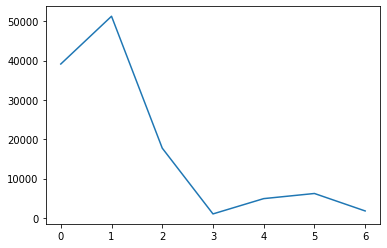

In [ ]:
plt.plot(history.history['loss'])

In [ ]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    #ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    #ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

In [ ]:
res_vgg = model_built.evaluate(X_test, y_test)

test_accuracy_vgg = res_vgg[-1]

print(f"test_accuracy_vgg = {round(test_accuracy_vgg,2)*100} %")

print(f"test_accuracy = {round(test_accurcy,2)*100} %")

print(f'Chance level: {1./num_classes*100:.1f}%')

1/1 [==============================] - 0s 80ms/step - loss: 2848.9688 - mse: 2848.9688
test_accuracy_vgg = 284897.0 %


NameError: ignored

In [ ]:
# #ternausnet
# pip install torch torchvision
# pip install opencv-python
# pip install ternausnet

In [ ]:
# %matplotlib inline
# from pylab import *
# #from skimage.morphology import watershed
# import scipy.ndimage as ndimage
# from PIL import Image, ImagePalette

# from torch.nn import functional as F
# from torchvision.transforms import ToTensor, Normalize, Compose
# import torch

# import tifffile as tiff
# import cv2
# import random
# from pathlib import Path

#from models.ternausnet2 import TernausNetV2